# PART A

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
import scipy.stats as stats
import random
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats import weightstats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
list1 = [
    23, 30, 20, 27, 44, 26, 35, 20, 29, 29,
    25, 15, 18, 27, 19, 22, 12, 26, 34, 15,
    27, 35, 26, 43, 35, 14, 24, 12, 23, 31,
    40, 35, 38, 57, 22, 42, 24, 21, 27, 33
]


price = pd.Series(list1)
price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 40 entries, 0 to 39
Series name: None
Non-Null Count  Dtype
--------------  -----
40 non-null     int64
dtypes: int64(1)
memory usage: 452.0 bytes


In [3]:
# Q1. Compute the mean, median and the mode of the data
print('Mean price  = ',round(price.mean(),2))
print('Median price= ',round(price.median(),2))
print('Mode :\n',round(price.mode(),2))

Mean price  =  27.62
Median price=  26.5
Mode :
 0    27
1    35
dtype: int64


In [4]:
# Q2. Compute the range , variance and standard deviation of  price

print('Range:',price.max() - price.min())
print('variance:',round(price.var(),2))
print("Standard Deviation:",round(price.std(),2))

Range: 45
variance: 92.6
Standard Deviation: 9.62


In [5]:
#Q3 Find the mean deviation for the data . The mean deviation is defined as below.
print(sum(price - price.mean())/len(price))

0.0


In [6]:
# Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

coe_ske = (3*(price.mean() - price.median()))/price.std()
coe_ske           

0.3507274737245009

In [7]:
# the data is Positively skewed

In [8]:
#Q5. Count the number of data values that fall within two standard deviations of
# the mean. Compare this with the answer from Chebyshev’s Theorem.

price_mean = price.mean()
price_std = price.std()
data  = price[(price <= price_mean + 2 * (price_std)) & (price >= price_mean - 2 * (price_std))  ]
len(data)

39

In [9]:
percent = 1 - (1/(2**2))
percent 

0.75

In [10]:
len(data)/len(price)

0.975

In [11]:
# Chebyshev’s Theorem states that minimun values within 2 standard deviation ins 75 percent
# while the actual data within the 2 standard deviation is 97.5 percent Theorem they hold true

In [12]:
#Q6 Find the three quartiles and the interquartile range (IQR)
print('Q1:',price.quantile(0.25))
print('Q2:',price.quantile(0.5))
print('Q3:',price.quantile(0.75))

IQR = price.quantile(0.75) - price.quantile(0.25)
print('Interquartile Range :',IQR)

Q1: 21.75
Q2: 26.5
Q3: 34.25
Interquartile Range : 12.5


In [13]:
# Q7. Are there any outliers in the data set ?
ul = price.quantile(0.75) + (1.5 * IQR)
ll = price.quantile(0.25) - (1.5 * IQR)

print('Upper Limit:',ul)
print('Lower Limit:',ll)
outliers = price[((price>= ul) | (price <= ll))]
outliers

Upper Limit: 53.0
Lower Limit: 3.0


33    57
dtype: int64

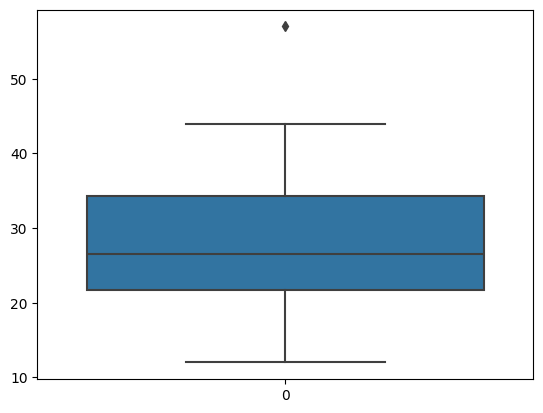

In [14]:
#Q8. Draw a boxplot of the dataset to confirm .
sns.boxplot(price)
plt.show()

In [15]:
#Q9 Find the percentile rank of the datapoint 25 .

stats.percentileofscore(price, 25)

42.5

In [16]:
# Q10. What is the probability that a shirt cost is above 25 dollars?


mean = price.mean()
std = price.std()
x = 25

print('The probability that a shirt cost is above 25 dollars: ',stats.norm.sf(x,mean,std))

The probability that a shirt cost is above 25 dollars:  0.6074919212644473


<Axes: ylabel='Count'>

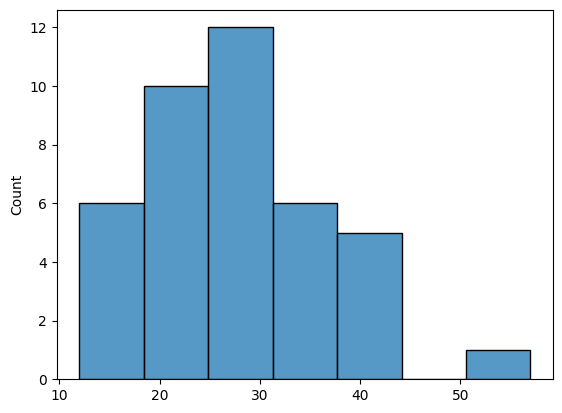

In [17]:
#Q11. Create a frequency distribution for the data and visualize it appropriately

sns.histplot(price)

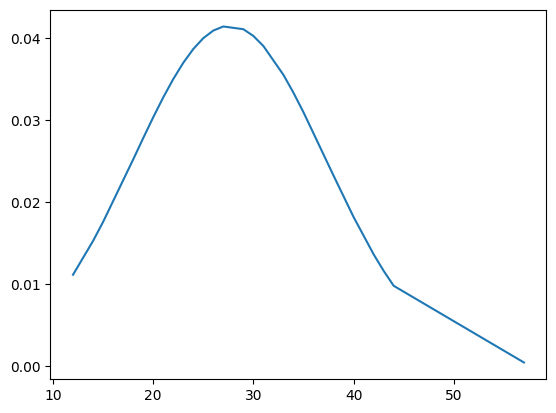

In [18]:
#Q12.Create a probability distribution of the data and visualize it appropriately.
pdf = stats.norm.pdf(price.sort_values(),price.mean(),price.std())
plt.plot(price.sort_values(),pdf)
plt.show()

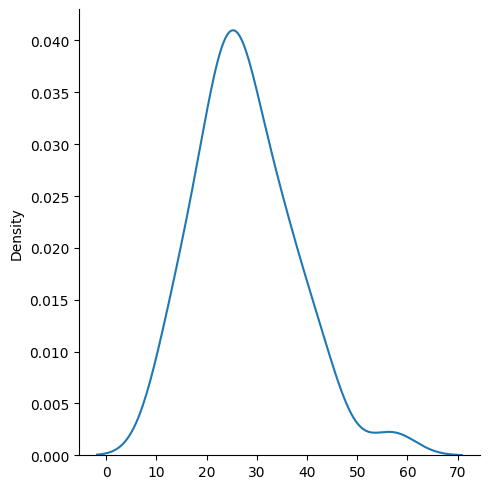

In [19]:
#Q13. What is the shape of the distribution of this dataset? Create an
# appropriate graph to determine that. Take 100 random samples with
# replacement from this dataset of size 5 each. Create a sampling distribution 
# of the mean shirt prices.. Compare with other sampling distributions of
# sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate
# the Central Limit Theorem?

# It is an almost a normally distribution dataset
sns.displot(price,kind='kde')

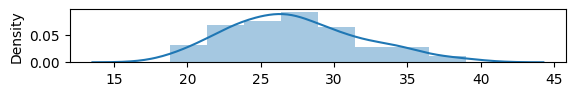

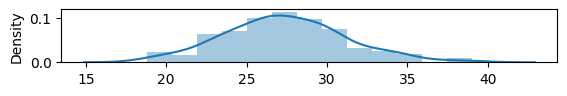

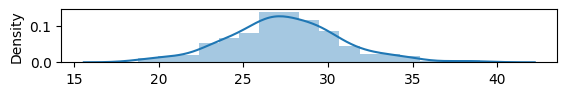

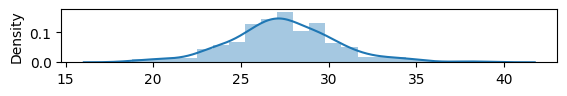

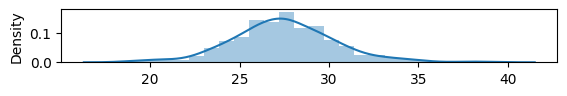

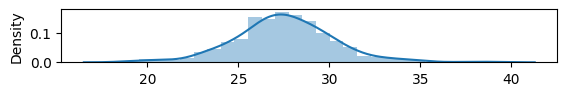

In [20]:
random.seed(0)
n_samples = 100
sample_means = []
size = [5,10, 15, 20, 25, 30]
for x,y in enumerate(size):
    for i in range(n_samples):
        sample= random.choices(price ,k = y ) 
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    plt.subplot(len(size),1,x+1)
    sns.distplot(sample_means)
    plt.show()

In [21]:
# as the sampel size increases the distribution of the sample mean becomes normal. It reaches mormal ditribution when n > 30 

Q14. Treat this dataset as a binomial distribution where p is the probability that a shirt costs above 25 dollars. What is the probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars?

In [22]:
mean = price.mean()
std = price.std()
x = 25
p  = stats.norm.sf(x,mean,std)
print('The probability that a shirt cost is above 25 dollars: :',p)

n = 10
i = 7

stats.binom.pmf(i,n,p)

The probability that a shirt cost is above 25 dollars: : 0.6074919212644473


0.22156981436825138

Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 dollars . Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars.   
[ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]


In [23]:
p= 0.60

n = 10

n_p = n * p
print(n_p)

n_q = n*(1-p)
print(n_q)

x = 7

sigma = np.sqrt(n*p*(1-p))
sigma


x1 = (x-0.5)
x2 = (x+0.5)

z1 = (x1-(n_p))/sigma
z2 = (x2-(n_p))/sigma


print('Probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars: ',round((stats.norm.cdf(z2) - stats.norm.cdf(z1)),4))

#stats.binom.pmf(7,10,0.60) #finding the probaility as Binomial distribution without normal apporximation

6.0
4.0
Probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars:  0.207


In [24]:
# since nq is less than 5,normal approximation is not suitable 

Q16. Compute a 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [25]:
n = len(price)
n

40

 Since the sample size is greater than 30.The central limit theorem states that the sampling distribution of mean follows a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt(n)}$.

In [26]:
n = len(price)
x_bar = price.mean()
s = price.std()

In [27]:
z_alpha_by_2  = stats.norm.isf(0.025)

num1 = x_bar - (z_alpha_by_2 *(s/np.sqrt(n)))

num2 = x_bar + (z_alpha_by_2 *(s/np.sqrt(n)))

print('Interval : [', num1,',', num2,']')

Interval : [ 24.642900805126224 , 30.607099194873776 ]


Q17. A data scientist wants to estimate with 95% confidence the true proportion of shirts having price greater than 25 dollars in the NuCloth website. A recent study showed that 60% of all shirts have a price greater than 25 dollars. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [28]:

p =0.6
margin_of_error = 0.02
alpha = 0.05


z_alpha_by_2  = stats.norm.isf(alpha/2)

samplesize = ((z_alpha_by_2/margin_of_error )** 2)  * p * (1-p)
print('The Required minimum sample Size :',round(samplesize))

The Required minimum sample Size : 2305


Q18. The same data scientist wants to estimate the true proportion of shirts having price greater than 25 dollars. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [29]:


p =0.60
margin_of_error = 0.05
alpha = 0.10


z_alpha_by_2  = stats.norm.isf(alpha/2)

samplesize = ((z_alpha_by_2/margin_of_error )** 2)  * p * (1-p)
print('The Required minimum sample Size :',round(samplesize))

The Required minimum sample Size : 260


Q19. NuCloth claims that currently 80% of all shirts have prices greater than 25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 shirts only 23 are having prices above 25 dollars.

In [30]:
# assume that the samples are normal 

p_pop =  0.80
p_samp = 23/30
n= 30
alpha  = 0.05

# ho : Shirts whose price greater than 25 dollars  p_pop = 0.80
# h1 : Shirts whose price greater than 25 dollars p_pop != 0.80

z_prop = (p_samp - p_pop) / ((p_pop)*(1 - p_pop)/n)**0.5
z_prop

-0.45643546458763834

In [31]:
zcritical = stats.norm.isf(alpha/2)
zcritical

1.9599639845400545

In [32]:
p_value = 2*(stats.norm.sf(abs(z_prop)))
p_value

0.6480768681391462

In [33]:
# pvalue > alpha
# fail to reject Null hypothesis
# 80% of Shirts have price greater than 25 dollars

Q20. A data scientist is researching the hypothesis that the average price of a shirt in NuCloth is higher than the supermarket. So he collects data from NuCloth and the supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34 dollars in the supermarket. The standard deviations are 7.6 and 5.8 respectively.Suppose the data scientist got these values after randomly selecting 100 shirts from each place.


    a. What hypothesis would he use to compare the shirt prices of NuCloth vs
    Supermarket
    b. What are critical values to be used?
    c. What statistical test will be used to compare these prices?
    d. Complete the test and obtain the P-value.
    e. Summarize his conclusion based on the P-value.

In [34]:
#a)What hypothesis would he use to compare the shirt prices of NuCloth vs Supermarket 

# ho:   Mu1 <= mu2  the average price of a shirt in NuCloth is lesser than or  equal to the supermarket.
# h1 :  Mu1 > Mu2 the average price of a shirt in NuCloth is higher than the supermarket.

In [35]:
# b. What are critical values to be used? 
# let us take the significane level of 0.05
alpha = 0.05
z_critical = stats.norm.isf(alpha)
z_critical

1.6448536269514729

In [36]:
# C)we will use two sample right tailed z test
# d) approach 1 
n1=n2 = 100
x1bar = 36
x2bar = 34
sigma1 = 7.6 # since the sample size > 30 we take sample standard deviation as sigma
sigma2 = 5.8 

den = (((sigma1**2) / n1)  + ((sigma2**2) /n2))**0.5
zstat = (x1bar - x2bar)/den
zstat


2.09197696327652

In [37]:
pvalue = stats.norm.sf(zstat)
pvalue

0.018220288245112185

In [38]:
#p-value = 0.018
# alpha = 0.05
# pvalue < alpha
# reject Ho
# the average price of a shirt in NuCloth is higher than the supermarket

# PART B

In [39]:
#  1. Read the datasets, Check the data types and Change the data types appropriately.
import json
data = [json.loads(line) for line in open("modcloth_final_data.json")]
df=pd.DataFrame(data)
df=df.set_index('item_id')
df.head(5)

,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
item_id,,,,,,,,,,,,,,,,,
123373,29,7,5.0,d,38,34,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
123373,31,13,3.0,b,30,36,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
123373,30,7,2.0,b,NaN,32,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
123373,NaN,18,5.0,b,NaN,36,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [40]:
df.dtypes

waist              object
size                int64
quality           float64
cup size           object
hips               object
bra size           object
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id            object
shoe size          object
shoe width         object
review_summary     object
review_text        object
dtype: object

In [41]:
# datatype conversion
df['bust']=df['bust'].replace({'37-39':37})
df[['waist','quality','hips','bra size','shoe size','size','bust']]=df[['waist','quality','hips','bra size','shoe size','size','bust']].astype('float')

In [42]:
# 2. Change the height column datatype to float after converting the values as shown Below. 5.7
df['height']=df['height'].replace({np.nan:'Null'})
df['height']=df['height'].map(lambda x: x.replace('ft','.'))
df['height']=df['height'].map(lambda x: x.replace(' ',''))
df['height']=df['height'].map(lambda x: x.rstrip('in'))
df['height']=df['height'].replace({'Null':np.nan})
df['height']=df['height'].astype('float')

In [43]:
# 3. Rename the names of the columns which have space in between the column.
# Ex: shoe size as shoe_size etc.
df.rename(columns={'cup size':'cup_size','bra size':'bra_size','shoe size':'shoe_size','shoe width':'shoe_width'},inplace=True)

In [44]:
# 4. Check the missing values and Identify the distribution of the variables to impute the
# missing values. Explain based on your analysis decide the features which can be 
# dropped and Which can be imputed. And also explain the reason to choose the 
# metric that you have chosen to impute the null values.
df[['waist','size','quality','hips','bra_size','bust','height','shoe_size']]=df[['waist','size','quality','hips','bra_size','bust','height','shoe_size']].fillna(df[['waist','size','quality','hips','bra_size','bust','height','shoe_size']].median())
df['cup_size'] = df['cup_size'].fillna(df.groupby('bra_size')['cup_size'].transform(lambda x: x.mode()[0]))
df['length']=df['length'].fillna(df['length'].mode()[0])
df['shoe_width']=df['shoe_width'].fillna(df.groupby('shoe_size')['shoe_width'].transform(lambda x:x.mode()[0]))
#df=df.drop(columns=['review_summary','review_text'])

- Review_summary and review_text column missing values cannot be imputed since those are reviews and it depends on each user
- All the numerical column's missing values can be imputed with median of that respective column. If the data is normally distributed, we can impute missing values with mean or median (mean = median) and if the distribution is skewed, missing values can be imputed with median. Hence in common numeric columns missing value is imputed with median value
- cup_size and bra size might have missing values for male customers and hence it wont add any meaning if imputed. But it has been filled with mode for each group of bra size for analysis purpose
- shoe_width missing values can be imputed with the mode grouped by shoe_size

In [45]:
# 5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3. 

array([29., 31., 27., 26., 28., 25., 32., 34., 44., 33., 23., 49., 37.,
       42., 20., 35., 24., 36., 40., 38., 48., 22., 41., 21., 39., 45.,
       43., 46., 47., 50.])

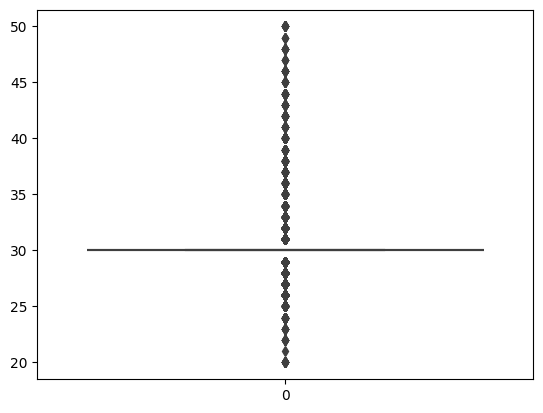

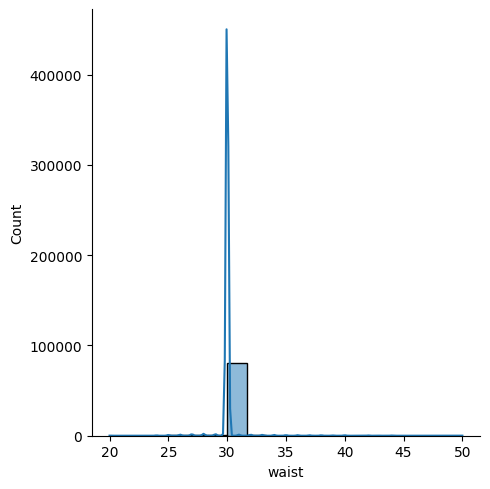

In [46]:
# Waist size
q1=df['waist'].quantile(0.25)
q3=df['waist'].quantile(0.75)
iqr=q3-q1
lb=abs((2.5*iqr)-q1)
ub=(2.5*iqr)+q3
sns.boxplot(df['waist'], whis=2.5)
sns.displot(df['waist'],kde=True)
df[(df['waist']>ub)|(df['waist']<lb)]['waist'].unique()

- For the waist column, the data is distributed around 2-3 values. Hence the peak is leptocratic and there other values are considered as outliers. There is a high chance that people with a particular range value of waist would have purchased more

array([30., 50., 49., 60., 52., 55., 51., 53., 54., 59., 57., 58., 56.])

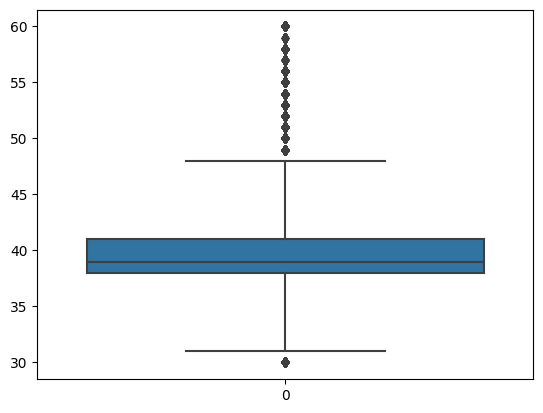

In [47]:
# Hip size
q1=df['hips'].quantile(0.25)
q3=df['hips'].quantile(0.75)
iqr=q3-q1
lb=abs((2.5*iqr)-q1)
ub=(2.5*iqr)+q3
sns.boxplot(df['hips'], whis=2.5)
df[(df['hips']<lb)|(df['hips']>ub)]['hips'].unique()

- There some +ve and -ve outliers in the hips column. This might be due to the fact these are rarely purchased sizes or there exists a chance that these values are undersized or oversized

array([ 9. ,  8.5, 11. ,  7. ,  6. ,  6.5, 10. ,  7.5,  5.5,  9.5, 10.5,
        5. , 11.5, 38. ])

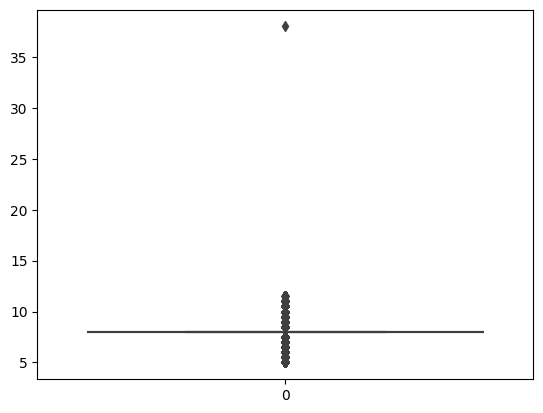

In [48]:
# Shoe size
q1=df['shoe_size'].quantile(0.25)
q3=df['shoe_size'].quantile(0.75)
iqr=q3-q1
lb=abs((2.5*iqr)-q1)
ub=(2.5*iqr)+q3
sns.boxplot(df['shoe_size'], whis=2.5)
df[(df['shoe_size']<lb)|(df['shoe_size']>ub)]['shoe_size'].unique()

- There is only one extreme +ve outlier which can be considered as mislead data since a person with foot size 38 doestnt exist. 
- The very commonly purchased size might be 8 where most of the data lie around. Hence the other values might not be considered as outliers

# Involve text analysis

In [49]:
# 6.Check for the category dress review and visualize the top 10 reviews using any 
# relevant plot. Identify the negative reviews if there are any.
res=df.groupby('category')['review_summary']
for key,item in res:
    print(key)
    print(res.get_group(key))

bottoms
item_id
654079     I love this skirt, I get
654079    I love the soft feel of t
654079      Cute skirt but runs big
654079    This is my favorite skirt
654079            Excellent Quality
                    ...            
768741     Great leggings, but they
768741                   Very comfy
768741    I am always weary about l
768741    Awesome! Totally comforta
768741    Wanted leggings to wear u
Name: review_summary, Length: 15266, dtype: object
dresses
item_id
148998                          NaN
148998                          NaN
159891    This dress. Is so amazing
159891    Best dress I've purchased
159891                       Lucky!
                    ...            
400541     This dress is absolutely
400541     Lovely dress  the cut is
400541    I've been watching this d
400541    Love, love, love this dre
400541    This is a very pretty dre
Name: review_summary, Length: 18650, dtype: object
new
item_id
123373                          NaN
123373                    

In [50]:
# 7. Find out the average shoe size for the different fits of the customer. Visualize 
# using any relevant plot. Explain that, Is there any significant different shoe sizes for 
# different fits?

Text(0, 0.5, 'Avg Shoe size')

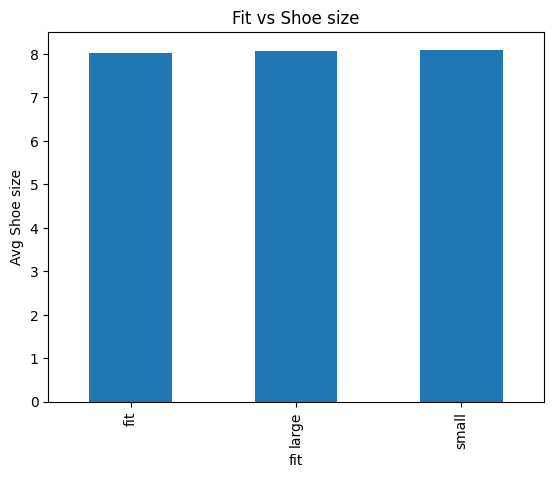

In [51]:
df.groupby('fit')['shoe_size'].agg('mean').plot(kind='bar')
plt.title('Fit vs Shoe size')
plt.ylabel('Avg Shoe size')

In [52]:
# 8. Identify the customer’s common shoe width and average size for those who 
# purchased the maximum quality. Is the mode of shoe width affect the user review?
# Visualize using the appropriate plot.


In [53]:
new=pd.DataFrame(df[df['quality']==df['quality'].max()].groupby('shoe_width')['shoe_size'].agg('mean')).reset_index()
new[new['shoe_width']==df[df['quality']==df['quality'].max()]['shoe_width'].mode()[0]]

,shoe_width,shoe_size
0,average,8.023418


- The common shoe width for those who purchased maximum quality is 'average' with the average shoe size of 8 

# text analysis based question

In [54]:
# 9. Extract the records belonging to the top 10 reviews, and then find the review 
# summary for the different cup sizes. The basic analysis explains what you would try to 
# infer. Try to use visualization.

In [55]:
# 10. Identify the most common review that we got from the customer whose hips size 
# is greater than 35. Find out what kind of inference you can make.
df[df['hips'] > 35]['review_summary'].unique()

array([nan, 'Too much ruching', 'Suits my body type!', ...,
       "It's a beautiful jacket.", 'I love this blazer!! I wo',
       "I love this piece. I'm re"], dtype=object)

In [56]:
# 11. What is the relationship between height and weight? Describe what kind of 
# relationship it has.
sns.jointplot(df['Height'],df['Weight'])
# There is no weight column in the given dataset

KeyError: 'Height'

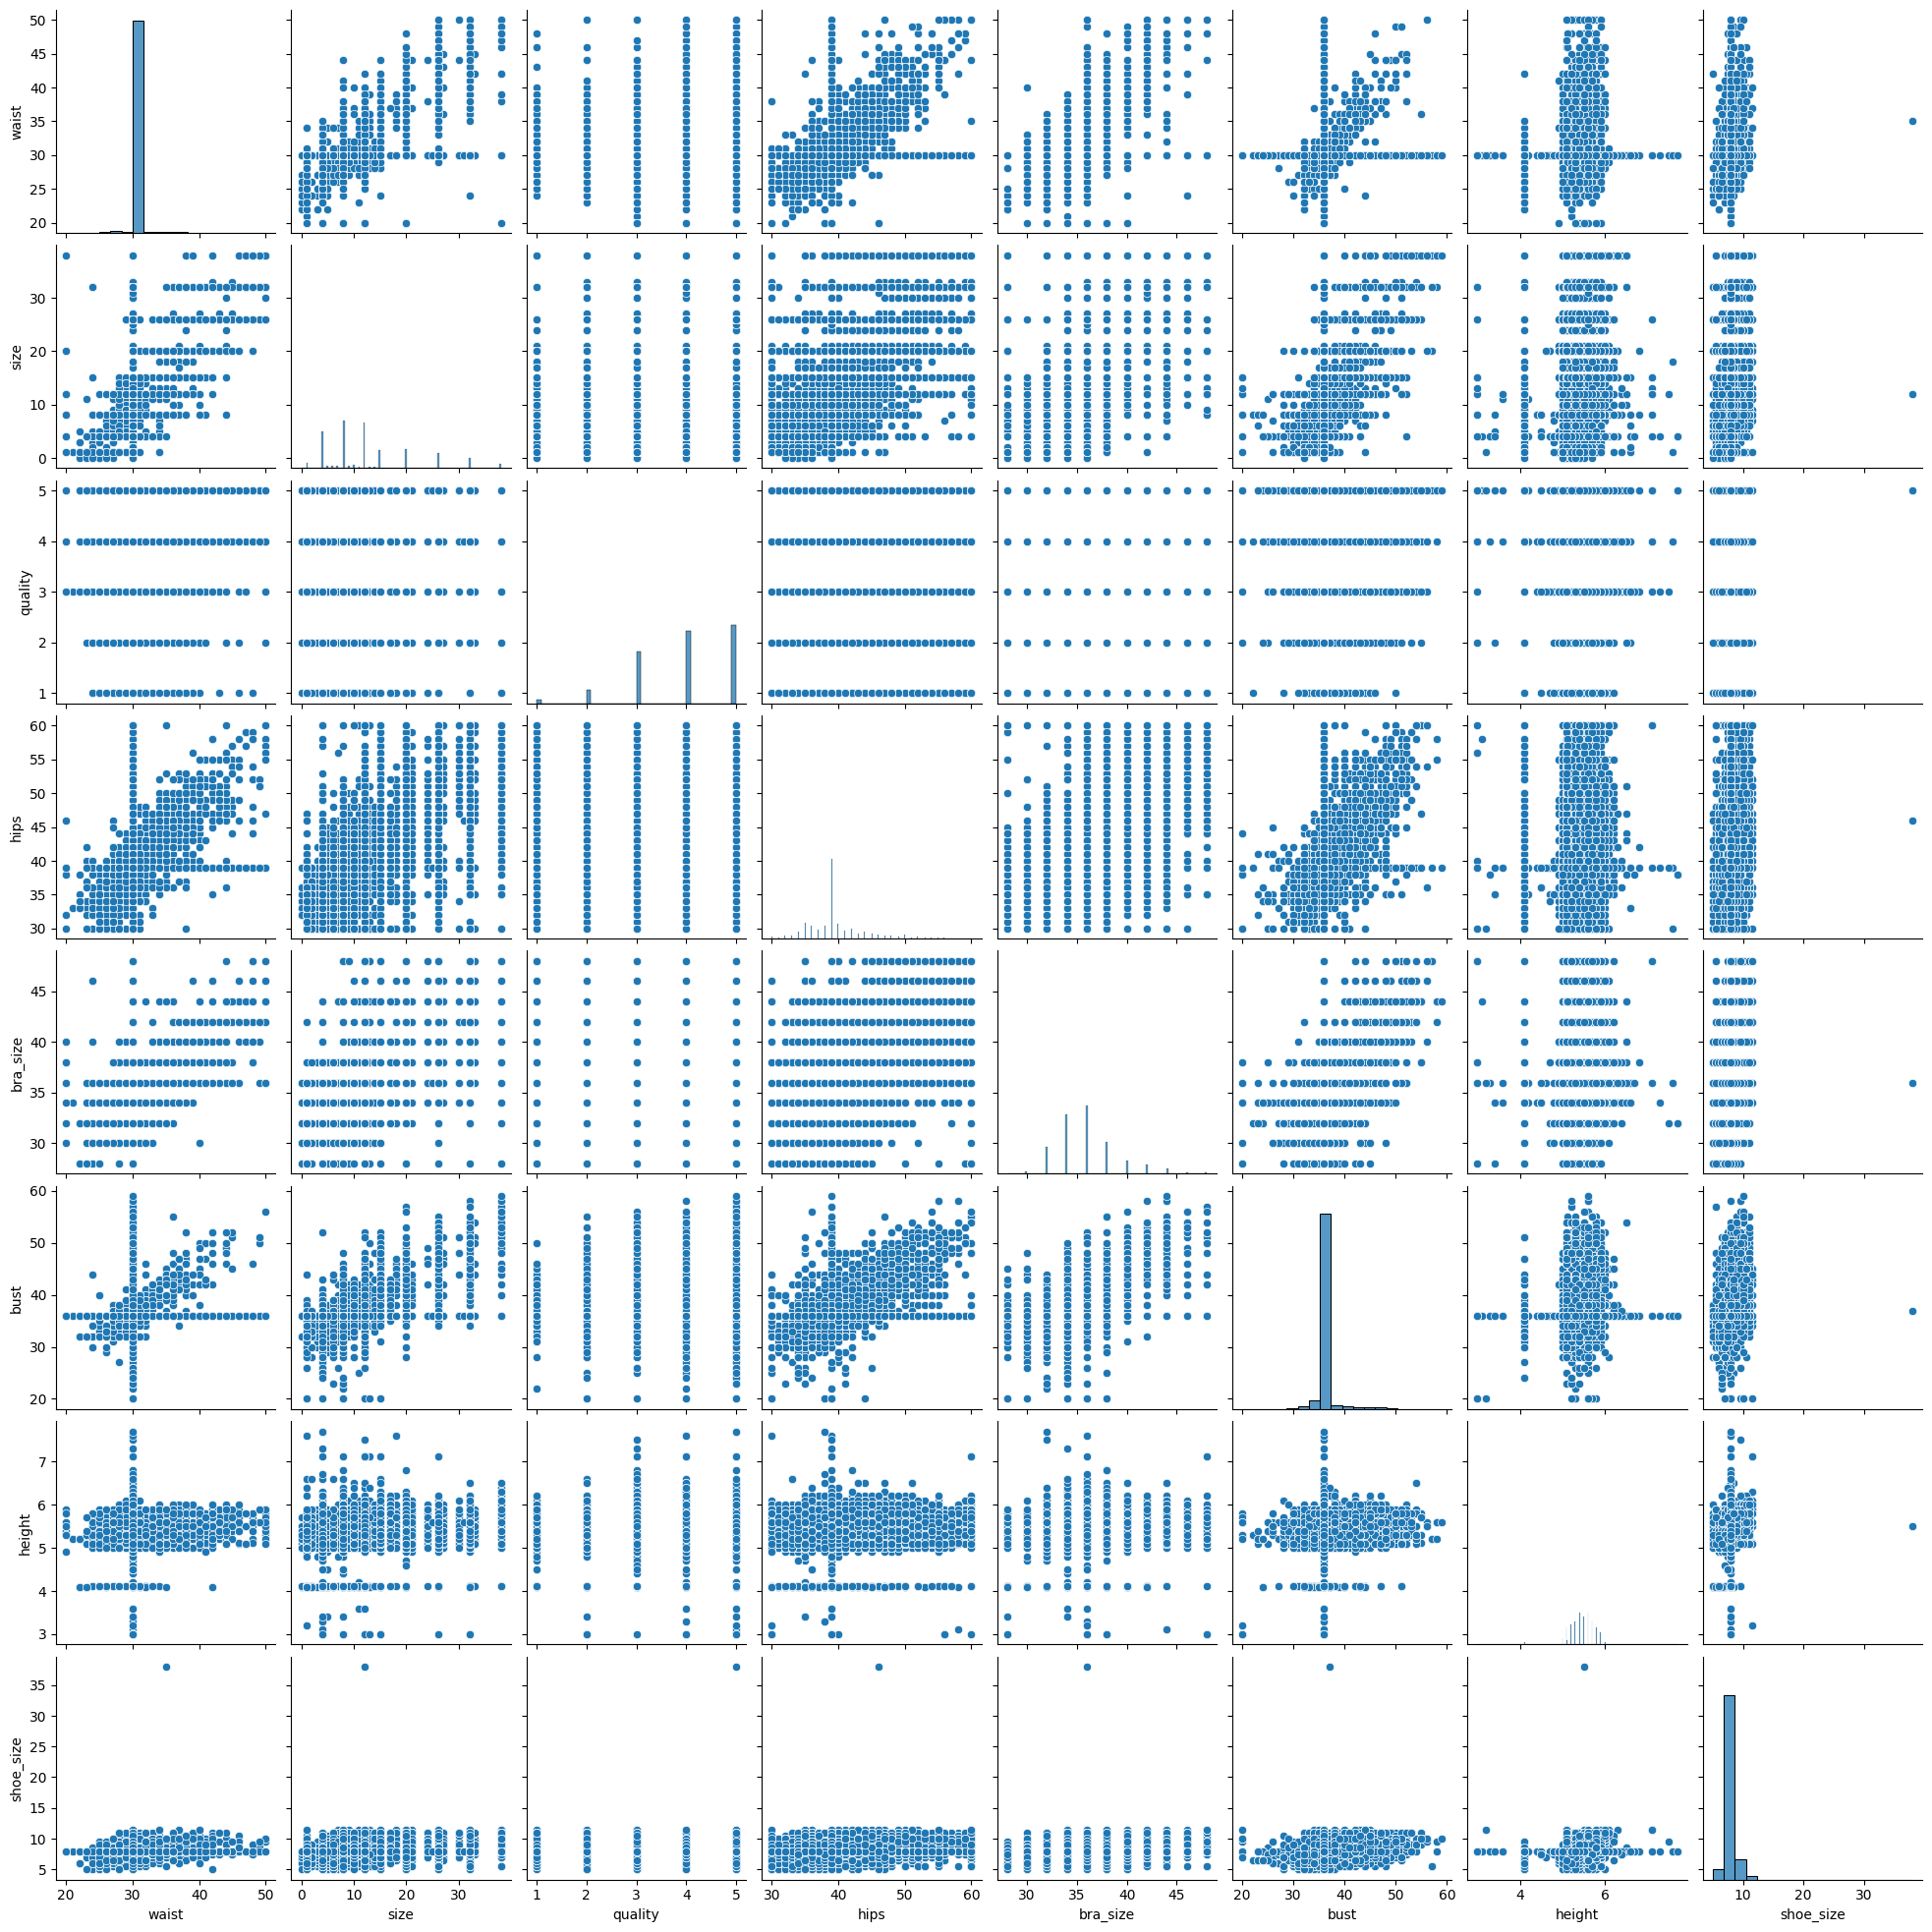

In [57]:
# 12. Plot the pair plot for the numerical plot. Explain according to your problem 
# statement how the pair plot would help you.
sns.pairplot(df.select_dtypes(exclude='O'))

- waist and bust has +ve correlation
- waist and hip size has +ve correlation
- waist and size has +ve correlation
- hip and bust has +ve correlation
- size and bust has +ve correlation
- With pair plot we can analyse the correlation between numerical columns and know the relationship between all the numerical variables

# Statistical Analysis

In [58]:
# 2. Test statistically whether the size and hips have any relationship using 0.05 
# alpha. Before the above test, Test the normality test

In [59]:
samp1=np.random.choice(df['size'], size=500, replace=False)
samp2=np.random.choice(df['hips'], size=500, replace=False)
print(stats.shapiro(samp1))
print(stats.shapiro(samp2))

ShapiroResult(statistic=0.881928026676178, pvalue=4.356138349893733e-19)
ShapiroResult(statistic=0.87129807472229, pvalue=6.659690565270953e-20)


- The data is not normal according to shapiro test

H0: There is no monotonic association between the two variables 

H1: There is some monotonic association between the two variables 

In [60]:
# The data is not normal and both the columns are quantitative. Hence we can proceed with spearman test
stats.spearmanr(samp1,samp2)

SignificanceResult(statistic=-0.020293688924339776, pvalue=0.6507708706135124)

p(0.75) > alpha. We fail to reject H0. Hence there is enough evidence to prove that there is no relationship between size and hip column

In [61]:
# 3. Does the quality significantly differ for any one shoe width? Test the test with 96%confidence intervals.
# Check the normality of the data before the above test. Alpha = .05

In [62]:
# Data splitting
s1=np.random.choice(df[df['shoe_width']=='average']['quality'],size=100,replace=False)
s2=np.random.choice(df[df['shoe_width']=='wide']['quality'],size=100,replace=False)
s3=np.random.choice(df[df['shoe_width']=='narrow']['quality'],size=100,replace=False)

In [63]:
# Check for data normality
print(stats.shapiro(s1))
print(stats.shapiro(s2))
print(stats.shapiro(s3))
# The data is not normally distributed according to shapiro test

ShapiroResult(statistic=0.8516460657119751, pvalue=1.3647740715327927e-08)
ShapiroResult(statistic=0.8531737923622131, pvalue=1.5562193311779993e-08)
ShapiroResult(statistic=0.8214566707611084, pvalue=1.1945524569512145e-09)


Since the data is not normally distributed, we go with Kruskal-Wallis test

H0: medians of each group are the same

H0: medians of atleast one group is different

In [64]:
h_statistic, p_value = stats.kruskal(s1,s2,s3)
print(p_value)

0.5686864233357196


p(0.15) < alpha, we fail to reject H0. Hence there is enough evidence to prove that the medians of each group is the same. There is no significant difference for quality column between each shoe_width value

In [65]:
# 6. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test.
# Check the normality of the data before the above test. Alpha = .05

In [66]:
# Data splitting
s1=np.random.choice(df[df['fit']=='small']['quality'],size=100,replace=False)
s2=np.random.choice(df[df['fit']=='fit']['quality'],size=100,replace=False)
s3=np.random.choice(df[df['fit']=='large']['quality'],size=100,replace=False)

In [67]:
# Check for data normality
print(stats.shapiro(s1))
print(stats.shapiro(s2))
print(stats.shapiro(s3))
# The data is not normally distributed according to shapiro test

ShapiroResult(statistic=0.8884341716766357, pvalue=4.2019050283670367e-07)
ShapiroResult(statistic=0.8306722044944763, pvalue=2.438703239349138e-09)
ShapiroResult(statistic=0.8542678356170654, pvalue=1.7105030281072686e-08)


Since the data is not normally distributed, we go with Kruskal-Wallis test

H0: medians of each group arae the same

H0: medians of atleast one group is different

In [68]:
h_statistic, p_value = stats.kruskal(s1,s2,s3)
print(p_value)

0.0007599680652607533


p(5.950238733039253e-06) < alpha, we tend to reject H0. Hence there is enough evidence to prove that the average quality significantly differ for atleast one group

In [69]:
#Post adhoc test

In [70]:
import scikit_posthocs as sp
data=[s1,s2,s3]
sp.posthoc_dunn(data)

,1,2,3
1,1.000000,0.000177,0.018849
2,0.000177,1.000000,0.160934
3,0.018849,0.160934,1.000000


From the above result, we can interpret that only group 2 and 3 (fit and large) have significantly different value of quality 